##Project 1: Exploratory Data Analysis.
The primary objective of this project is to perform EDA and extract some information from the data.

The dataset which I chose is crash dataset which contains following information such as  Year, Month, Day, Weekend, Hour the accident took place and
      Collision Type, Injury Type, Primary Factor, Reported Location,
       Latitude, Longitude of the accident.





## Primary Observation:
I have done Exploratory Data Analysis and found out:


*   large number accidents occured on weekdays than on weekends.
*   2-Car collision was the most common type of collision.
* Highest number of accidents took place in 2003 and least number of accidents took place in.
* Frequency of accidents at different parts of the day. Highest amount accidents were occured in afternoon and least amount of accidents were occured in midnight



## Proposal:
**Discovery of the Data Source**: While I was searching for the open datasets online which legal and free to download, I found a website called data.gov where we can download the datasets and work on them. While searching for the datasets within the website I found this dataset interesting and selected this dataset to work with.

**Cost incurred to download the dataset**: The dataset totally free to download. 

**Legality**: It is totally legal to download the dataset from their website and to work on it.

**Data types in the dataset**: String, Numeric, Categorical.

**Size of the data**:
* The size of dataset is 6.24MB
*	Number of rows in the dataset including the header: 53944
* Number of columns in the dataset: 12




## Data Source location

The data is available to download at the following link: https://catalog.data.gov/dataset/traffic-data/resource/e46a5cc5-ed4d-4b8d-b750-18e6c9ec570e

In [0]:
# Importing required libraries.
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
# Calculating the start time.
start_time = time.time()

In [37]:
# Reading the dataset.
df = pd.read_csv('/content/monroe-county-crash-data2003-to-2015.csv')
df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


Number of rows and columns in the dataset

In [38]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 53943
Number of columns: 12


**Performing different stats on the dataset**

In [39]:
df.describe()

,Master Record Number,Year,Month,Day,Hour,Latitude,Longitude
count,5.394300e+04,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,6.748119e+08,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.907563e+08,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,1.470500e+04,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,1.991074e+06,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,9.011241e+08,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,9.019039e+08,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,9.026394e+08,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


Some information about the dataset.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 12 columns):
Master Record Number    53943 non-null int64
Year                    53943 non-null int64
Month                   53943 non-null int64
Day                     53943 non-null int64
Weekend?                53875 non-null object
Hour                    53718 non-null float64
Collision Type          53937 non-null object
Injury Type             53943 non-null object
Primary Factor          52822 non-null object
Reported_Location       53908 non-null object
Latitude                53913 non-null float64
Longitude               53913 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.9+ MB


**Checking for duplicate records**

In [41]:
df.duplicated().sum()

0

### Finding Null values 

In [42]:
# Below are the number of null values in each column of the dataset.
df.isnull().sum()

Master Record Number       0
Year                       0
Month                      0
Day                        0
Weekend?                  68
Hour                     225
Collision Type             6
Injury Type                0
Primary Factor          1121
Reported_Location         35
Latitude                  30
Longitude                 30
dtype: int64

###Now, I'm finding the total missing data and the percentage of the missing data.

In [43]:
missing_data = df.isnull().sum().sum()
print("Total Missing data:",missing_data)
print("Percentage of Missing data: ",missing_data/(df.shape[0]*df.shape[1])*100,"%")

Total Missing data: 1515
Percentage of Missing data:  0.23404334204623398 %


Since, only 0.23% of the data is missing, it does not effect my analysis much and I feel leaving the data as it is a good option.

### Plot showing the count of accidents based on the collision type which occured on weekend and weekday.

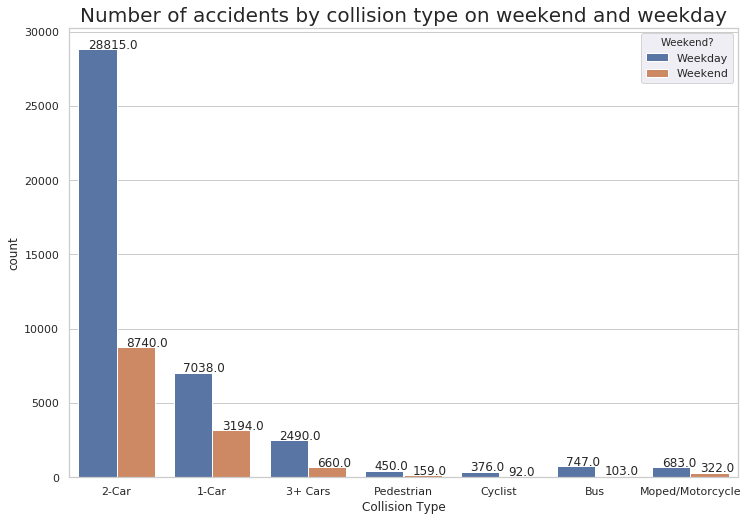

In [44]:
plt.title("Number of accidents by collision type on weekend and weekday", fontsize=20)
sns.set(rc={'figure.figsize':(12,8.27)}) #Reference: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(style='darkgrid')
p2 = sns.countplot(x= 'Collision Type', hue='Weekend?' , data= df)

#Reference: https://www.semicolonworld.com/question/56232/seaborn-countplot-with-frequencies
for p in p2.patches:
        p2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

#### Number of accidents that took place at different hours of the day. The hour part is rounded off to its nearest hour.

In [45]:
df.Hour.value_counts()

1700.0    4631
1600.0    4488
1500.0    4283
1200.0    3819
1400.0    3750
1300.0    3526
1800.0    3232
1100.0    3040
1900.0    2442
1000.0    2360
900.0     2318
800.0     2247
700.0     2031
2000.0    1918
2100.0    1794
2200.0    1503
2300.0    1187
0.0       1115
600.0      806
100.0      801
300.0      719
200.0      716
500.0      514
400.0      478
Name: Hour, dtype: int64

### Plot showing number accidents per year from 2003-2015

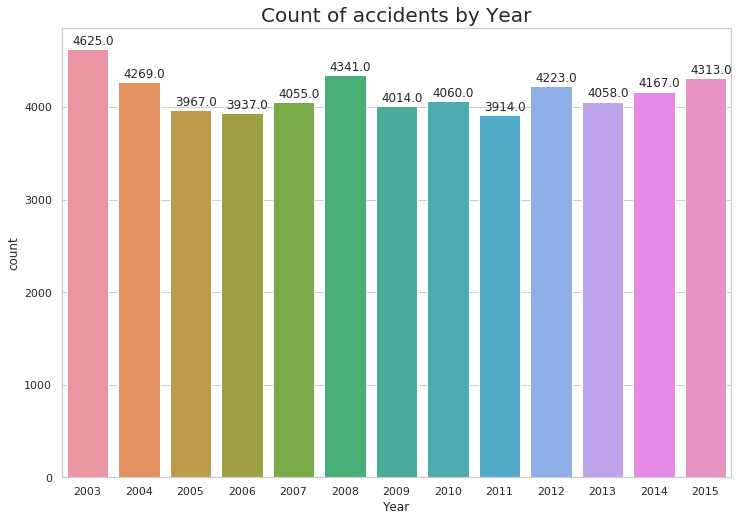

In [46]:
sns.set(style="whitegrid")
polt = sns.countplot(x = 'Year', data= df)
plt.title("Count of accidents by Year", fontsize=20)
#Reference: https://www.semicolonworld.com/question/56232/seaborn-countplot-with-frequencies
for p in polt.patches:
        polt.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In the below cell I'm creating a new column called "Part of Day".
The timeframes are:


*   Early Morning: 4:00 - 8:00
*  Morning: 8:00 - 12:00 
* Afternoon: 12:00 - 16:00
* Evening: 16:00 - 20:00
* Night: 20:00 - 00:00
* Midnight: 00:00 - 4:00




In [47]:
# Creating a new column and labeling the row with its specific timeframe

df["Part of Day"] = ''
for i in range(df.shape[0]):
    if(500.0 <= df.Hour[i] <= 800.0):
        df["Part of Day"][i] = "Early Morning"
    if(900.0 <= df.Hour[i] <= 1200.0):
        df["Part of Day"][i] = "Morning"
    if(1300.0 <= df.Hour[i] <= 1600.0):
        df["Part of Day"][i] = "Afternoon"
    if(1700.0 <= df.Hour[i] <= 2000.0):
        df["Part of Day"][i] = "Evening"
    if((2100.0 <= df.Hour[i] <= 2300.0) or df.Hour[i]==0.0):
        df["Part of Day"][i] = "Night"
    if(100.0 <= df.Hour[i] <= 400.0):
        df["Part of Day"][i] = "Midnight"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

In [48]:
df["Part of Day"].value_counts()/df.shape[0]*100

Afternoon        29.748067
Evening          22.659103
Morning          21.387390
Night            10.379475
Early Morning    10.377621
Midnight          5.031237
                  0.417107
Name: Part of Day, dtype: float64

In [0]:
# Calculating the percentage of accidents in each part of the day and storing it in a dictionary
parts_dict = (df["Part of Day"].value_counts()/df.shape[0]*100).to_dict()

In [50]:
#Validating
parts_dict

{'': 0.4171069462210111,
 'Afternoon': 29.74806740448251,
 'Early Morning': 10.377620821978756,
 'Evening': 22.659103127375193,
 'Midnight': 5.031236675750329,
 'Morning': 21.387390393563578,
 'Night': 10.379474630628627}

In [51]:
# Extracting the keys in the dict snd loading it in the list
keys_list = []
for keys in parts_dict.keys():
    keys_list.append(keys)
keys_list[-1] = "Null Values"
keys_list

['Afternoon',
 'Evening',
 'Morning',
 'Night',
 'Early Morning',
 'Midnight',
 'Null Values']

In [52]:
# Extracting the values from the dict and storing it in the list
values_list = []
for vals in parts_dict.values():
    values_list.append(vals)
values_list

[29.74806740448251,
 22.659103127375193,
 21.387390393563578,
 10.379474630628627,
 10.377620821978756,
 5.031236675750329,
 0.4171069462210111]

### Plot showing percentage of accidents that took place in different parts of the day

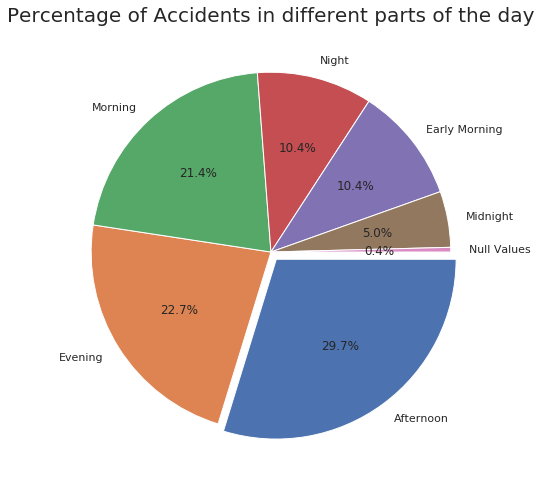

In [53]:
# Reference: http://www.datasciencemadesimple.com/pie-chart-in-python-with-legends/
explode = (0.05, 0, 0, 0, 0, 0, 0)
plt.pie(values_list, labels=keys_list,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=False)
plt.title('Percentage of Accidents in different parts of the day', fontsize=20)
plt.show()
 

### Calculating the runtime of the notebook

In [54]:
end_time = time.time()
print("Runtime of the notebook is", end_time-start_time ,"seconds")

Runtime of the notebook is 18.548344612121582 seconds
